In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fanalysis.pca import PCA
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram

# matplotlib inline

df = pd.read_csv("habitudes_alimentaires.csv",encoding="latin",sep = ";")

df. rename(columns = {'Unnamed: 0':'pays'}, inplace = True)
df = df.set_index(['pays'])
df = df.T
print(df)

pays        Crales  Riz  Pommes de terre  Sucre blanc  Lgumes  Fruits  Vin  \
RFA               68    2               81           36       64      89   25   
France            76    4               74           34      115      53   93   
Italie           127    3               41           31      172      69   87   
Pays Bas          60    3               81           37       82      84   13   
Belg. Lux.        72    2              101           35       60      64   66   
Russie            68    3              102           40       76      33    6   
Irlande           84    2              111           42       83      30    3   
Danemark          68    2               68           44       57      38   14   
Grce             82    4               70           24      237      57   45   

pays        Huiles vgtales  Margarine  Viande bov.  Viande porc.  Volailles  \
RFA                        6          7           24            58         84   
France                    1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.draw()


<AxesSubplot:xlabel='pays', ylabel='pays'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


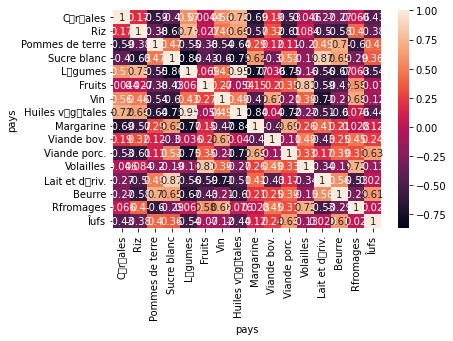

In [89]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [90]:
X = df.iloc[:,:].values
X

array([[ 68,   2,  81,  36,  64,  89,  25,   6,   7,  24,  58,  84,  85,
          6,  12,  17],
       [ 76,   4,  74,  34, 115,  53,  93,  12,   3,  33,  38,  90,  91,
          7,  18,  15],
       [127,   3,  41,  31, 172,  69,  87,  20,   1,  25,  24,  80,  84,
          2,  13,  11],
       [ 60,   3,  81,  37,  82,  84,  13,   4,  12,  21,  41, 136, 135,
          3,  13,  11],
       [ 72,   2, 101,  35,  60,  64,  66,   4,  10,  28,  41,  87,  89,
          8,  10,  14],
       [ 68,   3, 102,  40,  76,  33,   6,   8,   6,  23,  26,  14, 134,
          5,   6,  14],
       [ 84,   2, 111,  42,  83,  30,   3,   8,   4,  23,  32,  14, 187,
         11,   3,  14],
       [ 68,   2,  68,  44,  57,  38,  14,   7,  12,  13,  51,   9, 159,
          6,  10,  14],
       [ 82,   4,  70,  24, 237,  57,  45,  22,   1,  20,  18,  13,  64,
          1,   8,  12]], dtype=int64)

In [72]:
df.head()

pays,Crales,Riz,Pommes de terre,Sucre blanc,Lgumes,Fruits,Vin,Huiles vgtales,Margarine,Viande bov.,Viande porc.,Volailles,Lait et driv.,Beurre,Rfromages,Îufs
RFA,68,2,81,36,64,89,25,6,7,24,58,84,85,6,12,17
France,76,4,74,34,115,53,93,12,3,33,38,90,91,7,18,15
Italie,127,3,41,31,172,69,87,20,1,25,24,80,84,2,13,11
Pays Bas,60,3,81,37,82,84,13,4,12,21,41,136,135,3,13,11
Belg. Lux.,72,2,101,35,60,64,66,4,10,28,41,87,89,8,10,14


In [91]:
df = df.astype(float)

In [92]:
my_pca = PCA(std_unit=True, row_labels=df.index.values, col_labels=df.columns.values[0:16])

In [93]:
my_pca.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


PCA(col_labels=array(['C\x8er\x8eales', 'Riz', 'Pommes de terre', 'Sucre blanc',
       'L\x8egumes', 'Fruits', 'Vin', 'Huiles v\x8eg\x8etales',
       'Margarine', 'Viande bov.', 'Viande porc.', 'Volailles',
       'Lait et d\x8eriv.', 'Beurre', 'Rfromages', 'Îufs'], dtype=object),
    row_labels=array(['RFA', 'France', 'Italie', 'Pays Bas', 'Belg. Lux.', 'Russie',
       'Irlande', 'Danemark', 'Gr\x8fce'], dtype=object))

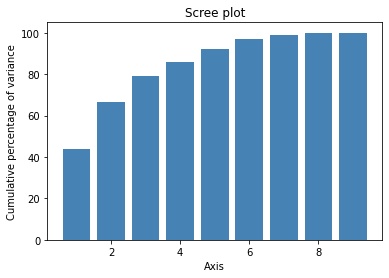

In [94]:
my_pca.plot_eigenvalues(type="cumulative")

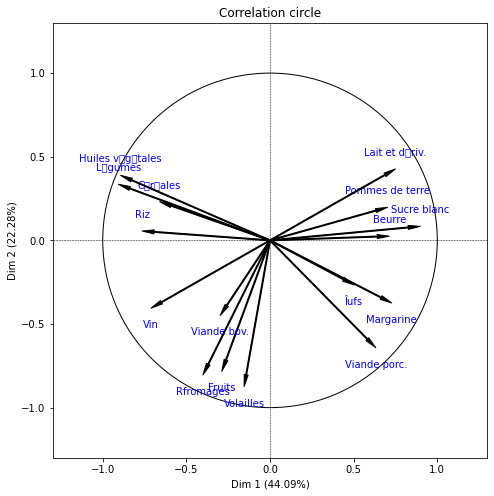

In [98]:
# Cercle des corrélations
# Les paramètres de la méthode correlation circle indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2, figsize=(10, 8))

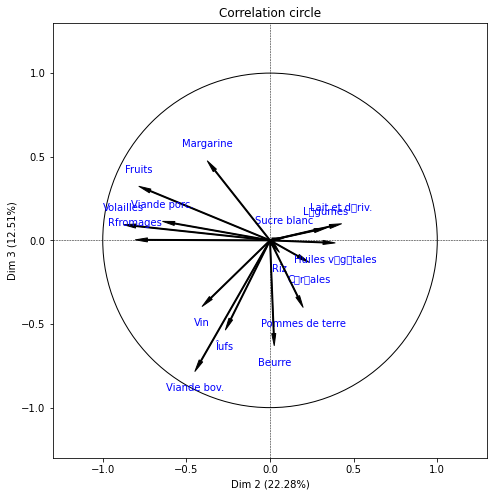

In [99]:
# Cercle des corrélations
# Les paramètres de la méthode correlation circle indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_pca.correlation_circle(num_x_axis=2, num_y_axis=3, figsize=(10, 8))

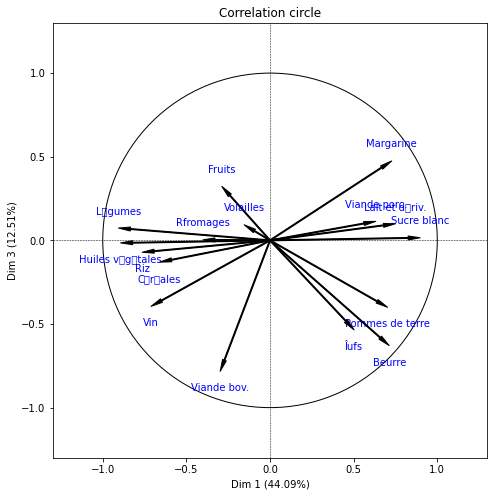

In [100]:
# Cercle des corrélations
# Les paramètres de la méthode correlation circle indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_pca.correlation_circle(num_x_axis=1, num_y_axis=3, figsize=(10, 8))

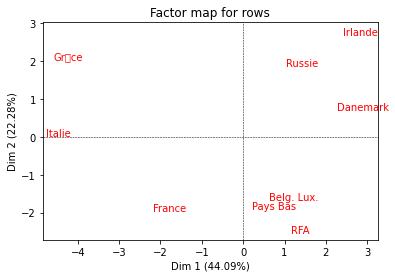

In [97]:
my_pca.mapping_row(num_x_axis=1, num_y_axis=2)